<a href="https://colab.research.google.com/github/Hamid-Mofidi/The-Principles-of-Deep-Learning-Theory/blob/main/Ch.%202%3A%20Neural%20Networks/2.1_2.2(Func.%20approx.%20and%20activ.%20funcs.).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 2 -- Neural Networks

In $§2.1$, we introduce the basic components of neural network architectures – neurons, activations, biases, weights, and layers – in order to define the multilayer perceptron (MLP), a simple model that is iteratively composed of these basic components.

In $§2.2$ we list some common activation functions that are often used in practice. Finally, we discuss in $§2.3$ how MLPs are initialized. In $§2.4$
we start developing our effective theory of MLPs with general activation functions.

## Function Approximation

The subject of artificial intelligence (AI) is mostly concerned with functions of this sort: easy for humans to compute, but difficult for humans to describe in terms of elementary operations.

The conceptual jump needed to represent such hard-to-describe functions is to start with a flexible set of functions ${f(x; \theta)}$, constructed from simple components parametrized by a vector of adjustable **model parameters** $\theta_μ$. One then tries to tune these model parameters $\theta_\mu$ judiciously in order to approximate the original complicated function such
that $f(x; \theta^*) ≈ f(x)$. The description of the set of functions $f(x; \theta_\mu)$ as well as the settings of the model parameters $θ^*_μ$ then serve as a useful approximate description of a desired function $f(x)$. This is called **function approximation** and the procedure for adjusting the model parameters $θ_μ$ is called **a learning algorithm**.

The most basic component of the neural network is the neuron. Loosely inspired by the behavior of biological neurons, the artificial neuron essentially consists of two simple operations:



*   The **preactivation** $z_i$ of a neuron is a linear aggregation of incoming signals $s_j$ where each signal is weighted by $W_{ij}$ and biased by $b_i$
$$
z_i(s) = b_i + ∑_{j=1}^{n_{in}}W_{ij}s_j, \hspace{1in} \text{for}~~i=1,\cdots, n_{out} \qquad (2.3)
$$
*   Each neuron then fires or not according to the weighted and biased evidence,
i.e. according to the value of the preactivation $z_i$, and produces an **activation**
$$
σ_i ≡ σ(z_i) \hspace{2.5in} (2.4)
$$
The scalar-valued function $σ(z)$ is called the **activation function** and acts independently on each component of the preactivation vector. 

Taken together, these nout neurons form a **layer**, which takes in the $n_{in}$-dimensional vector of signals $s_j$ and outputs the $n_{out}$-dimensional vector of activations $σ_i$. The organization of the neurons and their pattern of connections is known as the neural network **architecture**. The archetypical neural network architecture based on this principle of stacking layers of many neurons is called the **multilayer perceptron (MLP)**.



The MLP is recursively defined through the following iteration equations
$$
\begin{aligned}
z_i^{(1)}(x_α) &≡ b_i^{(1)} + ∑_{j=1}^{n_{0}}W_{ij}^{(1)}x_{j;α},\qquad \text{for} ~i=1,\cdots, n_1,  \quad (2.5)\\
z_i^{(l+1)}(x_α) &≡ b_i^{(l+1)} + ∑_{j=1}^{n_{l}}W_{ij}^{(l+1)}σ\big(z_{j}^{(l)}(x_α)\big),\qquad \text{for} ~i=1,\cdots, n_{l+1};~ l = 1,\cdots, L-1,
\end{aligned}
$$

which describes a network with $L$ layers of neurons, with each layer $l$ composed of $n_l$ neurons.

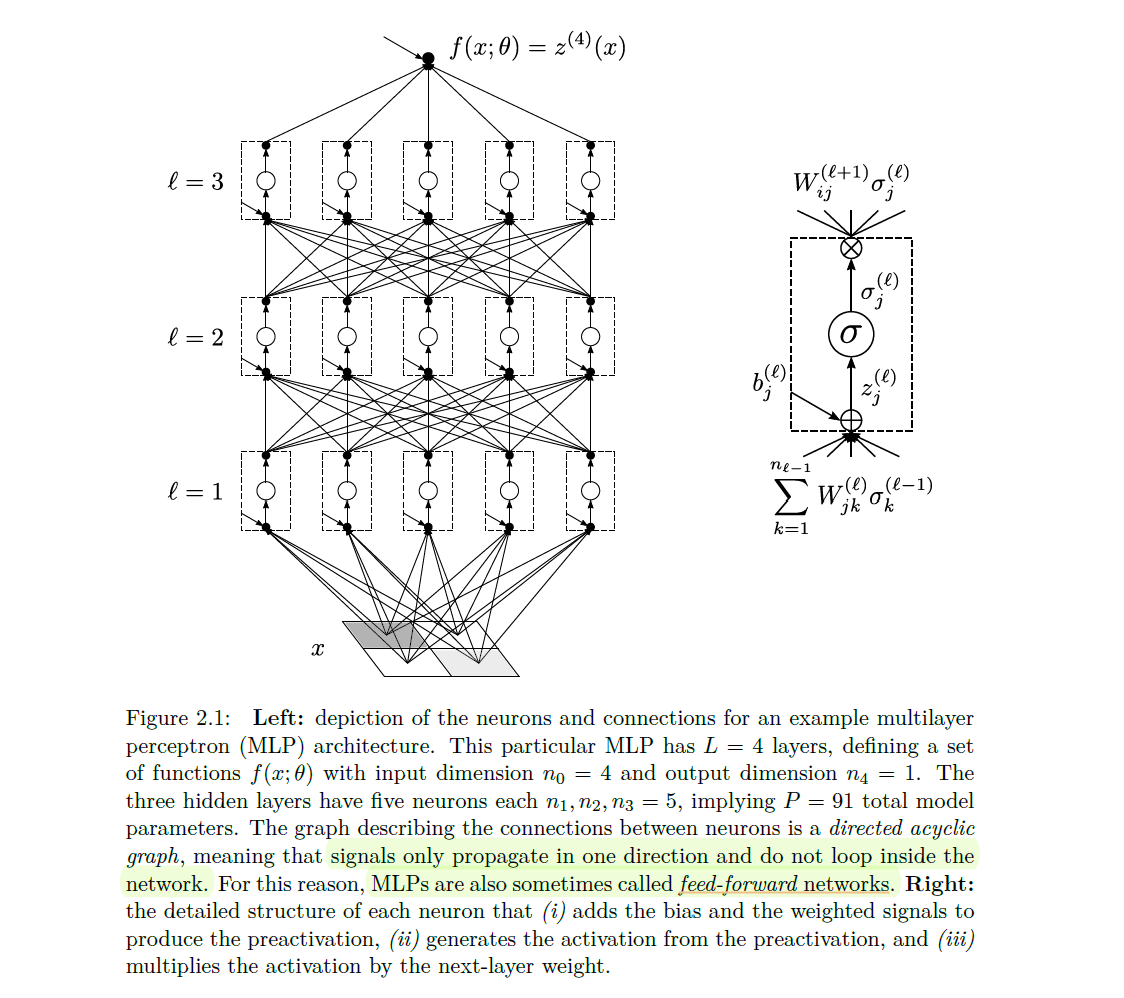

In [3]:
from IPython.display import Image, HTML

Image('Fig2.png')
display(Image('Fig2.png', width=800, height=600))

## 2.2 Activation Functions

In this section, we discuss some of the most common activation functions. To make it easier for you, we’ve plotted all these activation functions together in Figure 2.2. 

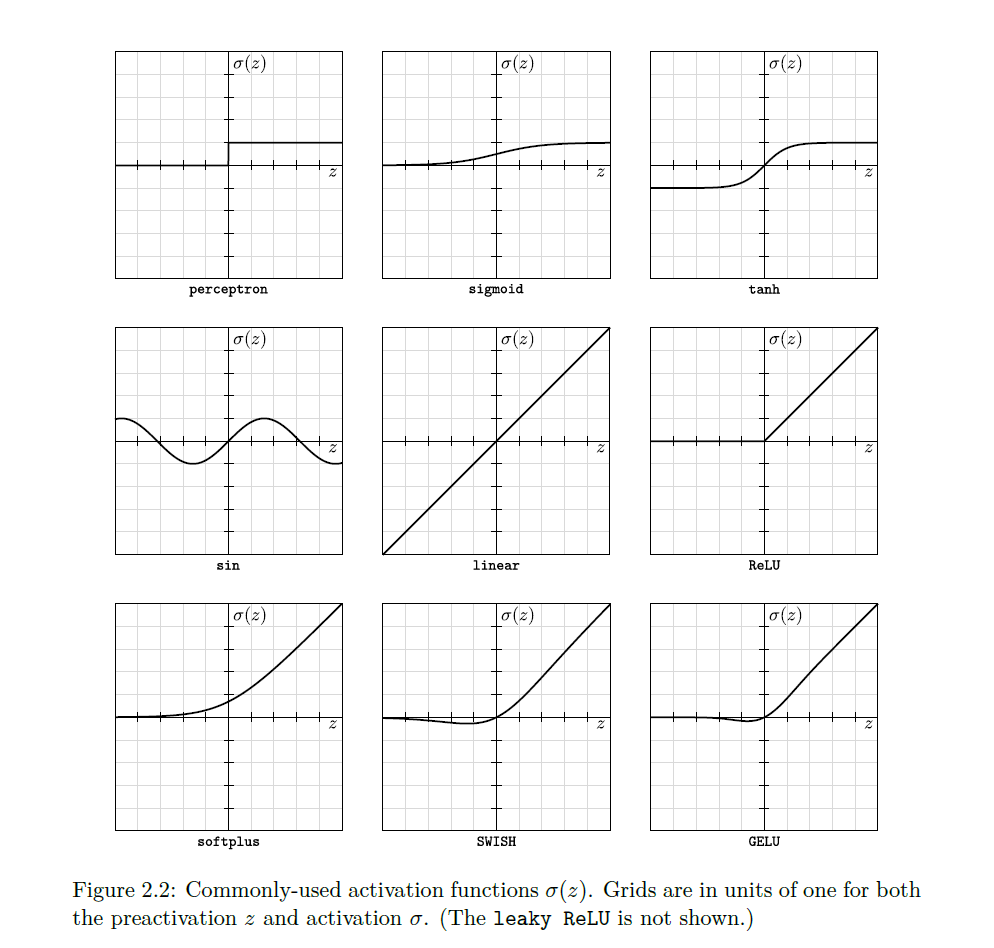

In [4]:
from IPython.display import Image, HTML

Image('Fig3.png')
display(Image('Fig3.png', width=800, height=600))



1.   **Sigmoid**: The sigmoid activation function is a logistic function
$$
σ(z) = \dfrac{1}{1+e^{-z}}
$$
2.    **Tanh**: The hyperbolic tangent or tanh activation function
$$
σ(z) = tanh(z) = \dfrac{e^z - e^{-z}}{e^z+e^{-z}}
$$
3. **ReLU**: Rectified Linear Unit (ReLU) is an activation function commonly used in neural networks. It is defined as follows:
$$
σ(z) = \max (z,0)
$$
In other words, the output of the ReLU function is the maximum of $0$ and the input value $z$. This means that if $z$ is positive, the ReLU function returns $z$, and if $z$ is negative, the ReLU function returns $0$.

The ReLU function is a simple and computationally efficient activation function that has been shown to work well in many neural network architectures. One of the main advantages of ReLU is that it helps to alleviate the vanishing gradient problem that can occur in deep neural networks. This is because ReLU has a derivative that is either $0$ or $1$, which means that gradients can be propagated through the network more easily.

Another advantage of ReLU is that it is non-saturating, which means that it does not suffer from the saturation problem that can occur with other activation functions such as sigmoid or tanh. This can help to prevent the network from getting stuck in a state where the gradients are too small to update the weights.



4. **ReLU-like: softplus, SWISH, and GELU**:
Despite the popularity of the ReLU, there’s an uneasiness about the fact that it’s not smooth. In an attempt to rectify the situation, a variety of smoothed-out ReLU-like activations have been proposed and achieved semi-popularity, of which we will consider the following three:


*   **The softplus activation funciton**: Softplus is a smooth approximation of the ReLU function. It is defined as follows:
$$
σ(z) = log(1 + e^{z})
$$
The output of the softplus function is the natural logarithm of $1$ plus the exponential of the input value $z$. This function is smooth and differentiable, which makes it a good choice for training neural networks using gradient-based optimization methods.
*   **SWISH**: Scaled Exponential Linear Unit (SWISH) is a relatively new activation function that has been shown to work well in deep neural networks. It is defined as follows:
$$
σ(z) = z * sigmoid(z) = \dfrac{z}{1+e^{-z}}
$$
The output of the SWISH function is the product of the input value $z$ and the sigmoid function applied to $z$. This function is similar to ReLU in that it is non-saturating and computationally efficient, but it has been shown to work better in some cases.
*   **GELU**: Gaussian Error Linear Unit (GELU) is another activation function that has been shown to work well in deep neural networks. It is defined as follows:
$$
σ(z) = 0.5 * z * \big(1 + erf(\dfrac{z}{\sqrt{2}})\big)
$$
where the error function $erf(z)$ is given by
$$
erf(z)≡ \dfrac{2}{\sqrt{\pi}} \int_0^{\pi} dt~e^{-t^2}
$$
which is a partial integration of the Gaussian function.
The output of the GELU function is a scaled version of the input value $z$ multiplied by the error function applied to $z$ divided by the square root of 2. This function is smooth and non-monotonic, which means that it can capture more complex patterns in the data than some other activation functions.

